<img src = 'images\grid.png' width = 250px/>

Num step:  32


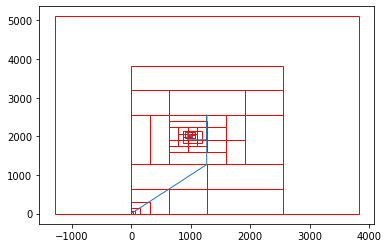

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
radius = 10
points = []
losses = [1]
origin = (0, 0)
origins = []
def compute_points():
    global origin, radius, points
    x, y = origin
    points.clear()
    points.append((x - radius, y + radius))
    points.append((x, y + radius))
    points.append((x + radius, y + radius))
    points.append((x - radius, y))
    points.append((x, y))
    points.append((x + radius, y))
    points.append((x - radius, y - radius))
    points.append((x, y - radius))
    points.append((x + radius, y - radius))
    return 

def loss(r, s):
    return ((1000 - r)**2 + (2015 - s)**2)**(1/2) 

def compute_loss():
    losses.clear()
    for x, y in points:
        losses.append(loss(x, y))
    index_min = np.argmin(losses)
    return index_min

def update(index_min):
    global origin, radius, points
    # Center point is not change
    if index_min == 4:
        radius /= 2  
    else:
        origin = points[index_min]
        radius *= 2
    compute_points()

compute_points()
i = 0
while(np.min(losses) > 10**(-5)):
    index_min = compute_loss()
    update(index_min)
    origins.append(origin)
    plt.gca().add_patch(Rectangle((origin[0] - radius, origin[1] - radius), 2*radius, 2*radius, edgecolor='red',
                    facecolor='none', lw=1))
    i += 1

print('Num step: ', i)

plt.plot(*zip(*origins), linewidth = 1) 
# plt.scatter(*zip(*origins), s = 0.1, color='black')
# for i in range(0, len(origins)):
#     print(origins[i])
#     plt.annotate(origins[i], (origins[i][0] + 0.3, origins[i][1] + 0.3))
plt.savefig('test.png', format='png', dpi=1200)